# Diabetes Prediction using Machine Learning

## Thành viên nhóm 14

- Võ Văn Khả - 2110264
- Trần Mậu Thật - 2112342
- Dương Thuận Đông - 2210762

## Giới thiệu
Bệnh tiểu đường là một nhóm các rối loạn chuyển hóa, trong đó mức đường huyết cao kéo dài trong một khoảng thời gian. Các triệu chứng của mức đường huyết cao bao gồm tiểu tiện thường xuyên, khát nước tăng, và cảm giác đói tăng. Nếu không được điều trị, bệnh tiểu đường có thể gây ra nhiều bến chứng nghiêm trọng. Các biến chứng cấp tính có thể bao gồm nhiễm toan ceton do tiểu đường, tình trạng tăng đường huyết tăng áp lực thẩm thấu, hoặc tử vong. Các biến chứng lâu dài nghiêm trọng bao gồm bệnh tim mạch, đột quỵ, bệnh thận mãn tính, loét chân, và tổn thương mắt.

## Mục tiêu
Mục tiêu của tập dữ liệu là dự đoán chẩn đoán xem một bệnh nhân có bị tiểu đường hay không, dựa trên một số chỉ số chẩn đoán được bao gồm trong tập dữ liệu.

## Tập dữ liệu
Tập dữ liệu dự đoán bệnh tiểu đường là một tập hợp thông tin y tế và nhân khẩu học từ các bệnh nhân, cùng với trạng thái bệnh tiểu đường của họ (dương tính hoặc âm tính). Dữ liệu bao gồm các đặc điểm như tuổi, giới tính, chỉ số khối cơ thể (BMI), tình trạng tăng huyết áp, bệnh tim, tiền sử hút thuốc, mức HbA1c, và mức đường huyết. Tập dữ liệu này có thể được sử dụng để xây dựng các mô hình học máy nhằm dự đoán bệnh tiểu đường ở bệnh nhân dựa trên lịch sử y tế và thông tin nhân khẩu học của họ.

- **age:** yếu tố quan trọng vì bệnh tiểu đường thường được chẩn đoán nhiều hơn ở người lớn tuổi, dao động từ 0 đến 80
- **gender:** có 3 loại là *male*, *female* và *other*
- **hypertension:** giá trị của tăng huyết áp là 0 hoặc 1, trong đó 0 chỉ ra rằng bệnh nhân không bị tăng huyết áp, còn 1 có nghĩa là bệnh nhân bị tăng huyết áp.
- **heart_disease:** giá trị của bệnh tim là 0 hoặc 1, trong đó 0 chỉ ra rằng bệnh nhân không mắc bệnh tim, còn 1 có nghĩa là bệnh nhân mắc bệnh tim
- **smoking_history:** được phân thành 5 nhóm: *not current* (không hút hiện tại), *former* (đã từng hút), *No Info* (không có thông tin), *current* (đang hút), *never* (chưa bao giờ hút), và *ever* (từng hút)
- **bmi:** BMI cao hơn có liên quan đến nguy cơ mắc bệnh tiểu đường cao hơn. Trong tập dữ liệu, BMI dao động từ 10.16 đến 71.55:
    - BMI dưới 18.5: gầy (underweight)
    - MI từ 18.5 đến 24.9: bình thường (normal)
    - BMI từ 25 đến 29.9: thừa cân (overweight)
    - BMI từ 30 trở lên: béo phì (obese)
- **HbA1c_level:** thước đo mức đường huyết trung bình của một người trong 2-3 tháng gần đây. Mức HbA1c cao hơn cho thấy nguy cơ mắc bệnh tiểu đường cao hơn. Thông thường, mức HbA1c trên 6.5% được coi là chỉ báo của bệnh tiểu đường
- **blood_glucose_level:** đề cập đến lượng glucose trong máu tại một thời điểm nhất định. Mức đường huyết cao là một dấu hiệu chính của bệnh tiểu đường
- **diabetes:** biến mục tiêu được dự đoán, với giá trị 1 chỉ ra sự hiện diện của bệnh tiểu đường và giá trị 0 chỉ ra sự vắng mặt của bệnh tiểu đường

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

## Input data

In [ ]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
#Tổng quan về cấu trúc data frame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [ ]:
#Thông số thống kê cơ bản
print(df.describe())

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

In [ ]:
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'smoking_history']
quantitative_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

## Data cleaning

##### Count missing values

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


##### Handling Duplicates

In [ ]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.shape)

(3854, 9)


In [ ]:
df = df.drop_duplicates()
print(df[df.duplicated()].shape)

(0, 9)


##### Remove unnecessary values

In [ ]:
for column in df.columns:
    print(df[column].value_counts())
    print("-" * 50)

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64
--------------------------------------------------
age
80.00    4932
51.00    1566
47.00    1511
48.00    1508
53.00    1498
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64
--------------------------------------------------
hypertension
0    88685
1     7461
Name: count, dtype: int64
--------------------------------------------------
heart_disease
0    92223
1     3923
Name: count, dtype: int64
--------------------------------------------------
smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64
--------------------------------------------------
bmi
27.32    21666
23.00      103
27.12      101
24.96      100
27.80      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: c

In [ ]:
df = df[df['gender'] != 'Other']
print(df['gender'].value_counts())

gender
Female    56161
Male      39967
Name: count, dtype: int64


## Data visualization


#### Distribution

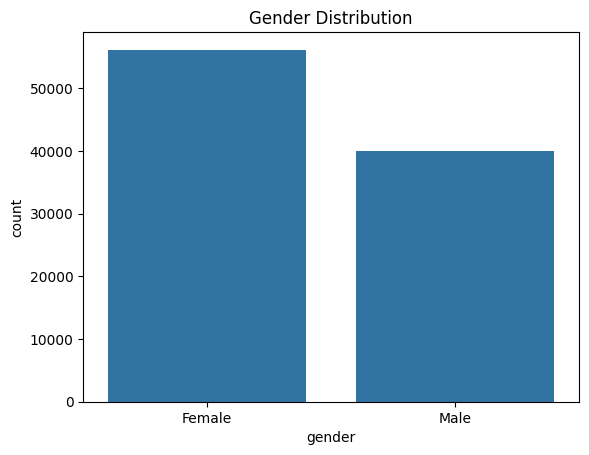

In [ ]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

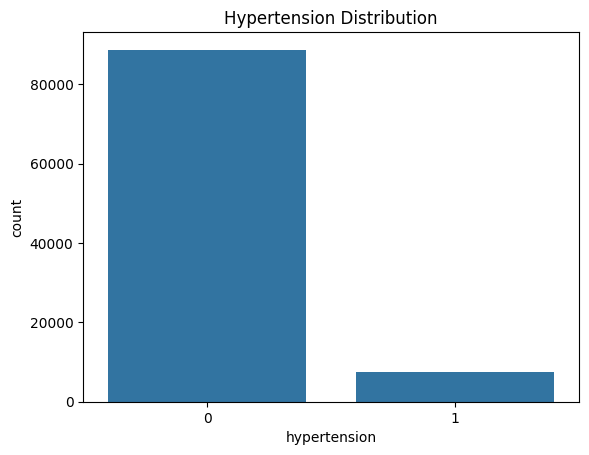

In [ ]:
sns.countplot(x='hypertension', data=df)
plt.title('Hypertension Distribution')
plt.show()

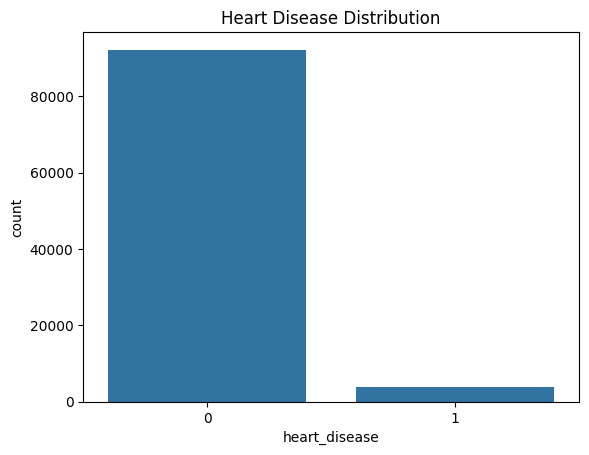

In [ ]:
sns.countplot(x='heart_disease', data=df)
plt.title('Heart Disease Distribution')
plt.show()

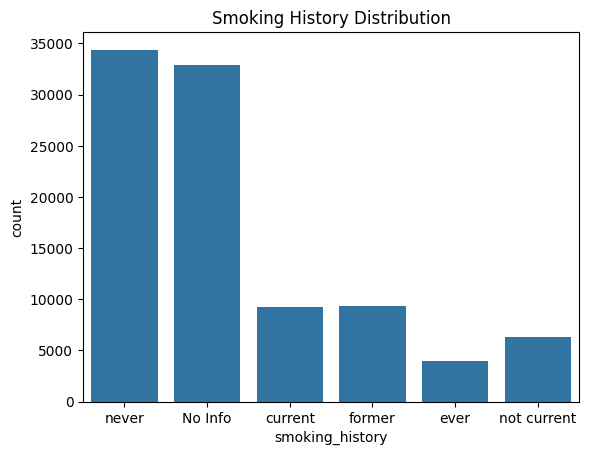

In [ ]:
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

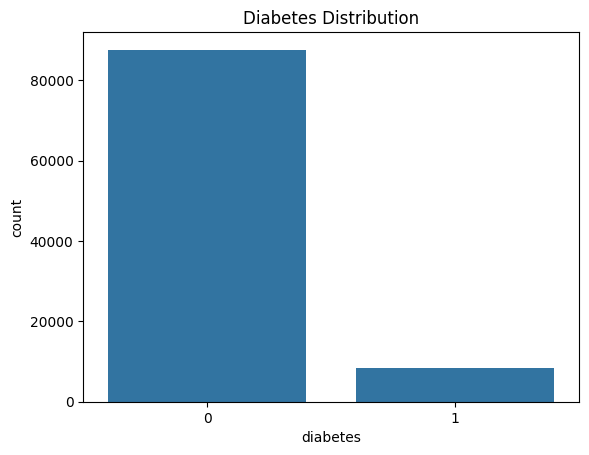

In [ ]:
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()

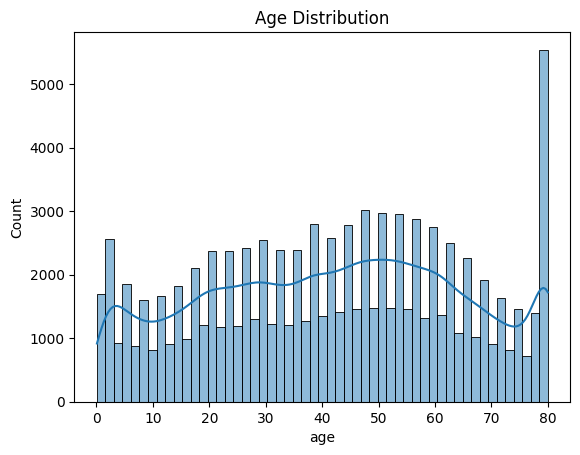

In [ ]:
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

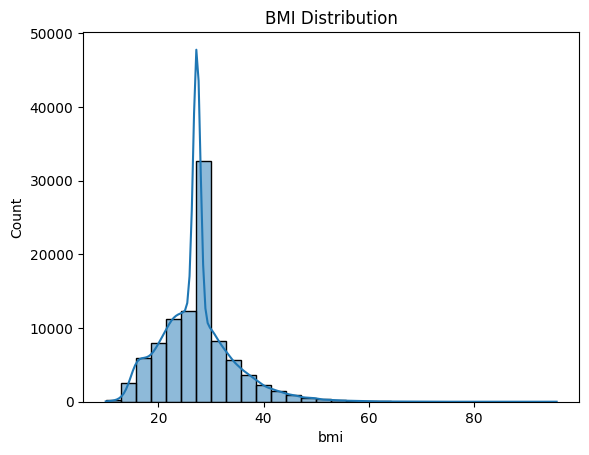

In [ ]:
sns.histplot(df['bmi'], kde=True, bins=30)
plt.title('BMI Distribution')
plt.show()

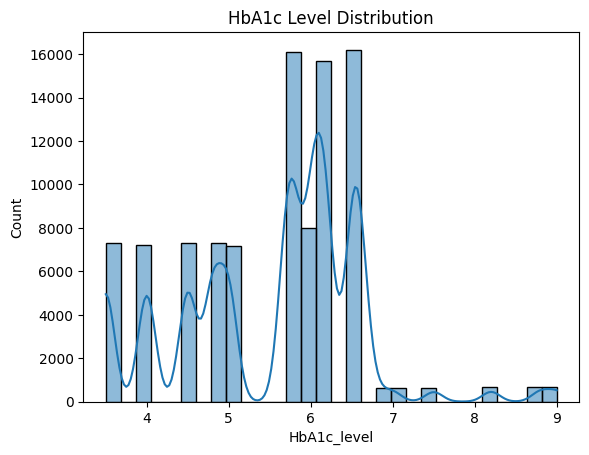

In [ ]:
sns.histplot(df['HbA1c_level'], kde=True, bins=30)
plt.title('HbA1c Level Distribution')
plt.show()

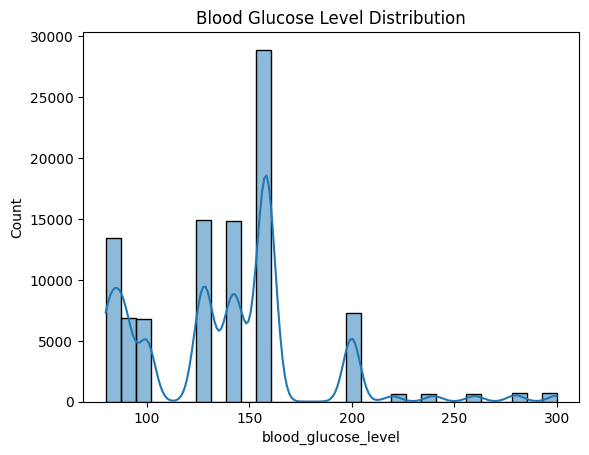

In [ ]:
sns.histplot(df['blood_glucose_level'], kde=True, bins=30)
plt.title('Blood Glucose Level Distribution')
plt.show()

#### Pairplot of quantitative columns


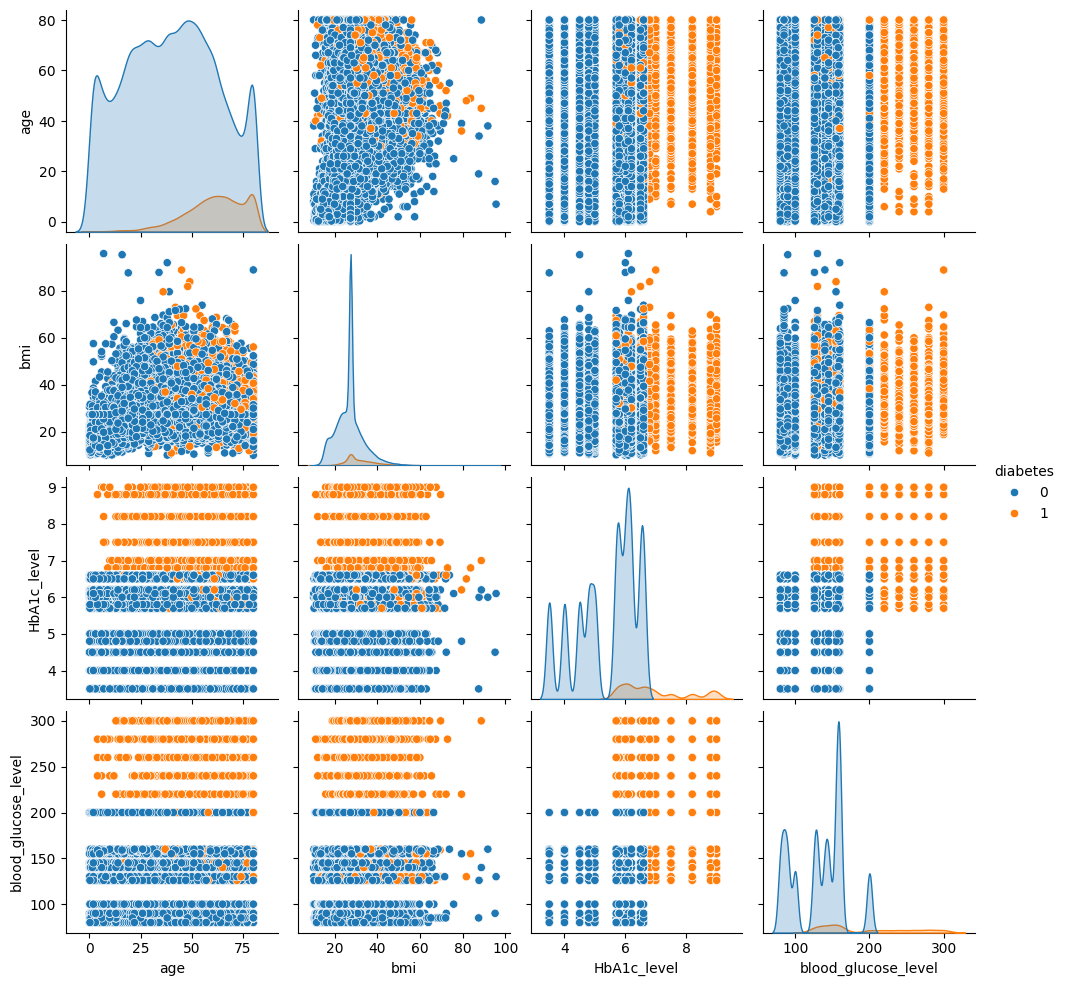

In [ ]:
df_quantitative = df[quantitative_columns]
sns.pairplot(df_quantitative, hue='diabetes')
plt.show()

**Phân phối đơn biến (trên đường chéo)**  
- **Age**: nhóm mắc bệnh tiểu đường chủ yếu tập trung ở độ tuổi từ 25 trở lên.  
- **Bmi**: nhóm mắc bệnh tiểu đường chủ yếu tập trung từ giá trị chỉ số khối từ 20 (kg/m^2) trở lên, trong đó tập trung nhiều nhất là từ 20 - 40.  
- **HbA1c_level**: nhóm mắc bệnh tiểu đường thường có chỉ số HbA1c từ 5.5% trở lên, trong đó tất cả các mẫu có chỉ số HbA1c khoảng từ 7% trở lên đều mắc bệnh tiểu đường.  
- **Blood_glucose_level**: nhóm mắc bệnh tiểu đường thường có mức đường huyết từ 125 mg/dL trở lên, tập trung nhiều trong khoảng từ 100-200, ngoài ra tất cả các mẫu có mức đường huyết từ 205 trở lên đều mắc bệnh tiểu đường.

**Mối quan hệ giữa các cặp biến (ngoài đường chéo)**  

- **Age và bmi**: các mẫu bị tiểu đường phần lớn có cả age và bmi cao, nhưng có một vài mẫu bị tiểu đường với giá trị age cao và bmi thấp. Nhìn chung các mẫu không phân bố rõ ràng mà chồng chéo lên nhau, có thể kết luận cả age và bmi đều có ảnh hưởng đến bệnh tiểu đường, age có ảnh hưởng lớn hơn nhưng không đáng kể.  
- **Age và HbA1c_level**: các mẫu phân bố một cách rõ ràng theo trục tung, hầu hết các mẫu thuộc nhóm bị tiểu đường đều nằm bên phía có HbA1c_level cao mà không quan tâm giá trị age. Điều này chứng tỏ HbA1c_level có ảnh hưởng đến bệnh tiểu đường lớn hơn age rất nhiều.  
- **Age và blood_glucose_level**: tương tự như HbA1c_level, blood_glucose_level có ảnh hưởng lớn hơn rất nhiều so với age.
- **Bmi và HbA1c_level/blood_glucose_level**: HbA1c_level và blood_glucose_level đều có ảnh hưởng đối với bệnh tiểu đường lớn hơn bmi.
- **HbA1c_level và blood_glucose_level**: có sự khác biệt so với bmi hay age, các mẫu không phân bố theo trục tung hay trục hoàng, thay vào đó phân phối theo đường chéo. Các mẫu mắc bệnh tiểu đường đều có cả giá trị HbA1c_level và blood_glucose_level cao. Chứng tỏ các hai giá trị này đều có ảnh hưởng lớn đến bệnh tiểu đường.




#### Countplot of categorical columns


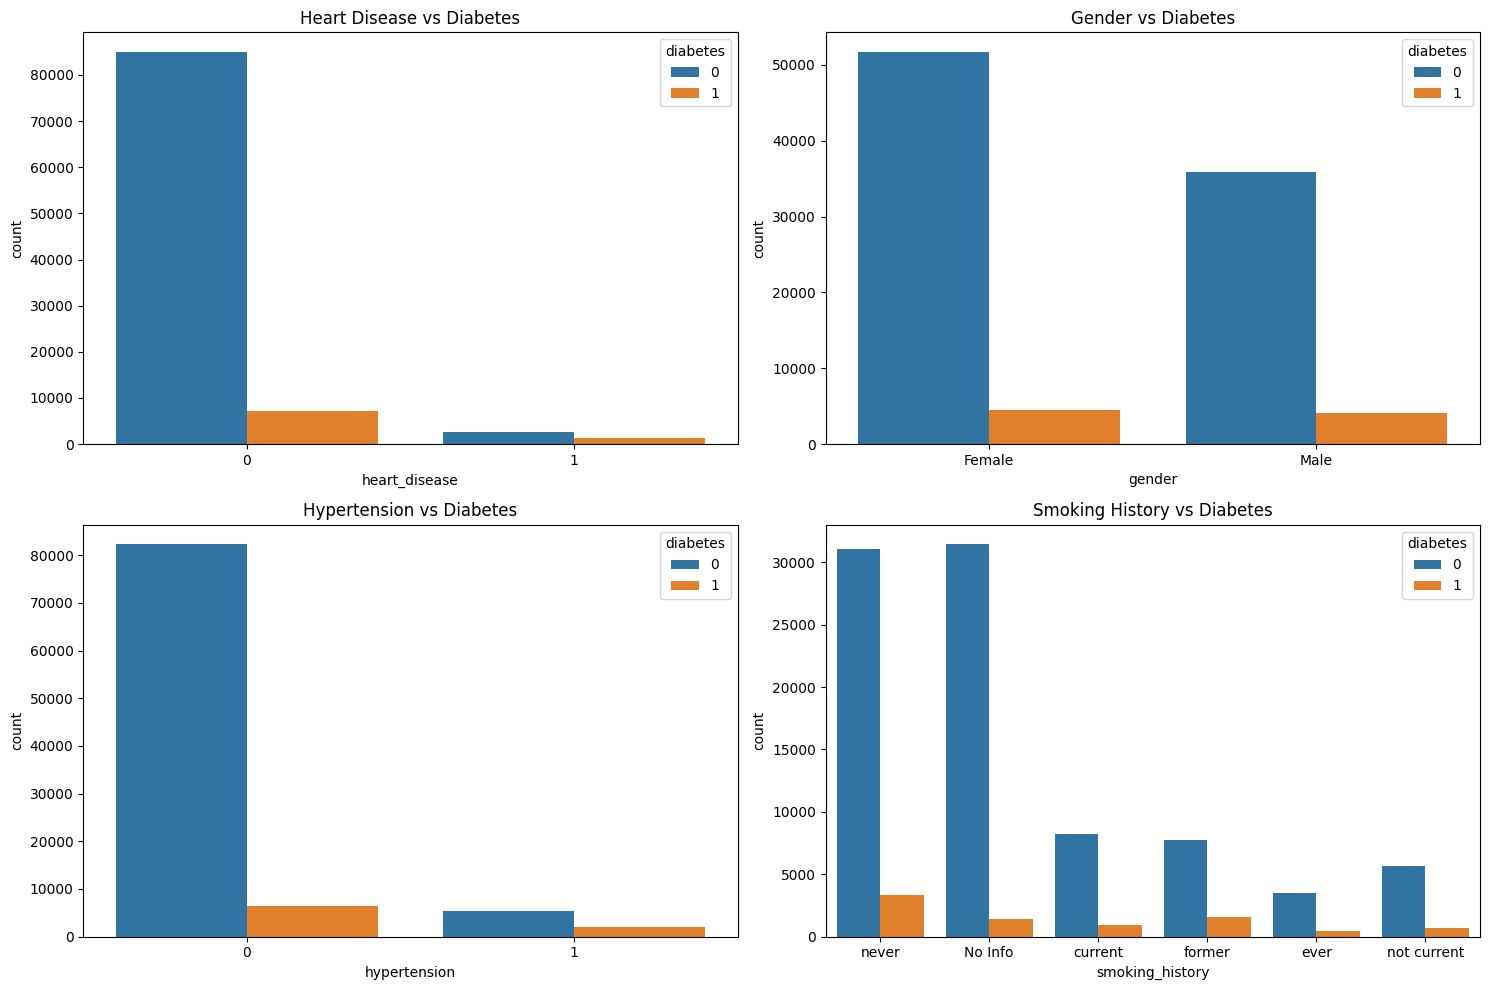

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(data=df, x='heart_disease', hue='diabetes', ax=axes[0, 0])
axes[0, 0].set_title('Heart Disease vs Diabetes')

sns.countplot(data=df, x='gender', hue='diabetes', ax=axes[0, 1])
axes[0, 1].set_title('Gender vs Diabetes')

sns.countplot(data=df, x='hypertension', hue='diabetes', ax=axes[1, 0])
axes[1, 0].set_title('Hypertension vs Diabetes')

sns.countplot(data=df, x='smoking_history', hue='diabetes', ax=axes[1, 1])
axes[1, 1].set_title('Smoking History vs Diabetes')

plt.tight_layout()

plt.show()

- **Heart_disease**: trong tập mắc bệnh tim, tỉ lệ người mắc bệnh tiểu đường cao hơn so với so với tập không mắc bệnh, có thể nói bệnh tim có ảnh hưởng đến bệnh tiểu đường.  
- **Gender**: trong tập nam giới, tỉ lệ người mắc bệnh tiểu đường cao hơn một chút so với so với tập nữ giới.  
- **Hypertension**: tương tự, tình trạng tăng huyết áp cũng có ảnh hưởng đến bệnh tiểu đường.  
- **Smoking_history**: nhìn chung, lịch sử hút thuốc lá được phân bố không rõ ràng, khó có thể kết luận liệu biến này có ảnh hưởng đến bệnh tiểu đường hay không.

####Box plot

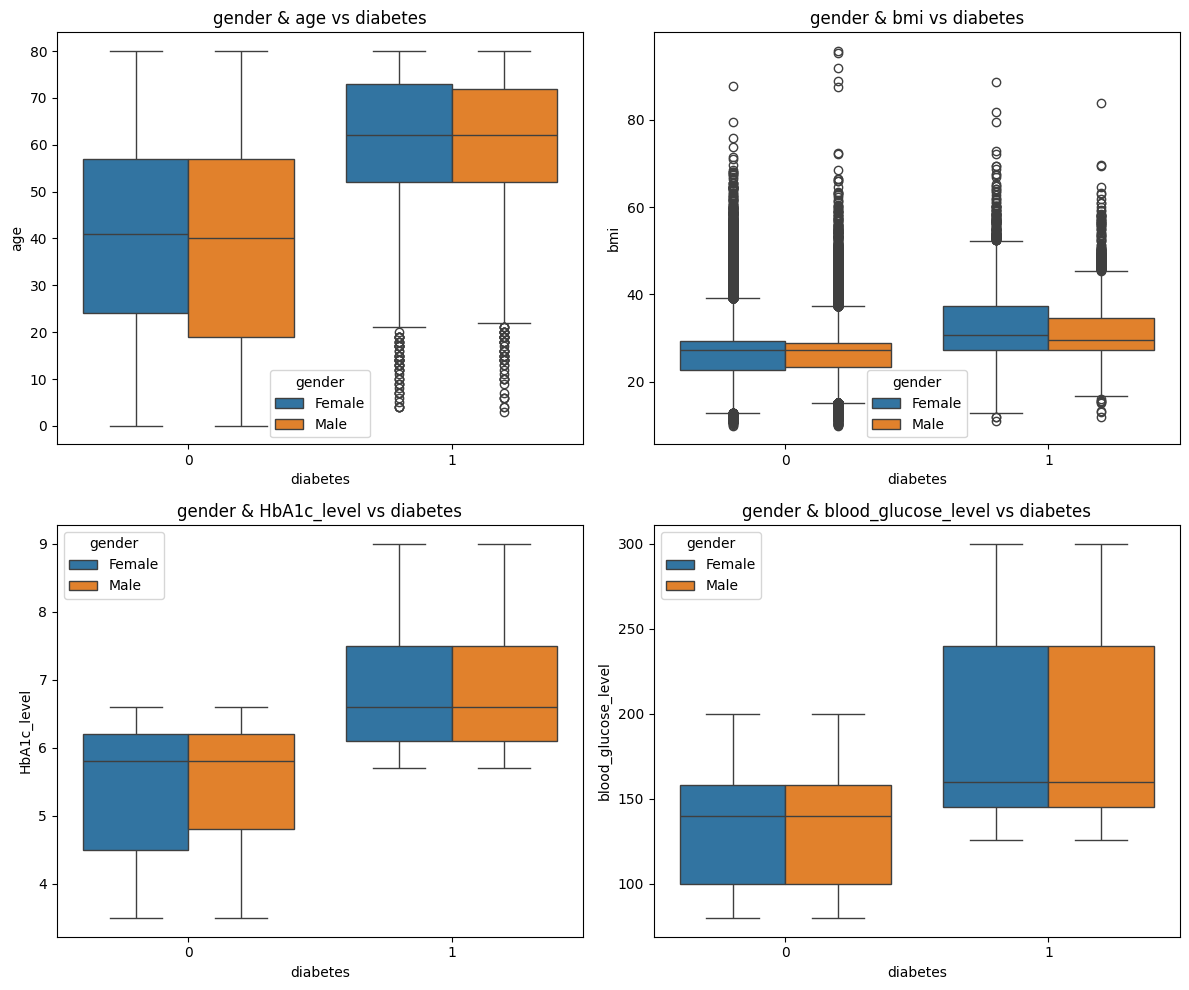

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(data=df, x='diabetes', y='age', hue='gender', ax=axes[0, 0])
axes[0, 0].set_title('gender & age vs diabetes')
sns.boxplot(data=df, x='diabetes', y='bmi', hue='gender', ax=axes[0, 1])
axes[0, 1].set_title('gender & bmi vs diabetes')
sns.boxplot(data=df, x='diabetes', y='HbA1c_level', hue='gender', ax=axes[1, 0])
axes[1, 0].set_title('gender & HbA1c_level vs diabetes')
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level', hue='gender', ax=axes[1, 1])
axes[1, 1].set_title('gender & blood_glucose_level vs diabetes')
plt.tight_layout()
plt.show()

 **Nhận xét:**
  Nhìn chung không có sự khác biệt quá nhiều giữa 2 nhóm male và female, do đó có thể nói rằng các biến định lượng có ảnh hưởng nhiều hơn so với biến định tính gender. Tuy nhiên, ở mức bmi cao thì nữ có tỷ lệ mắc bệnh tiểu đường cao hơn nam một ít.
  \

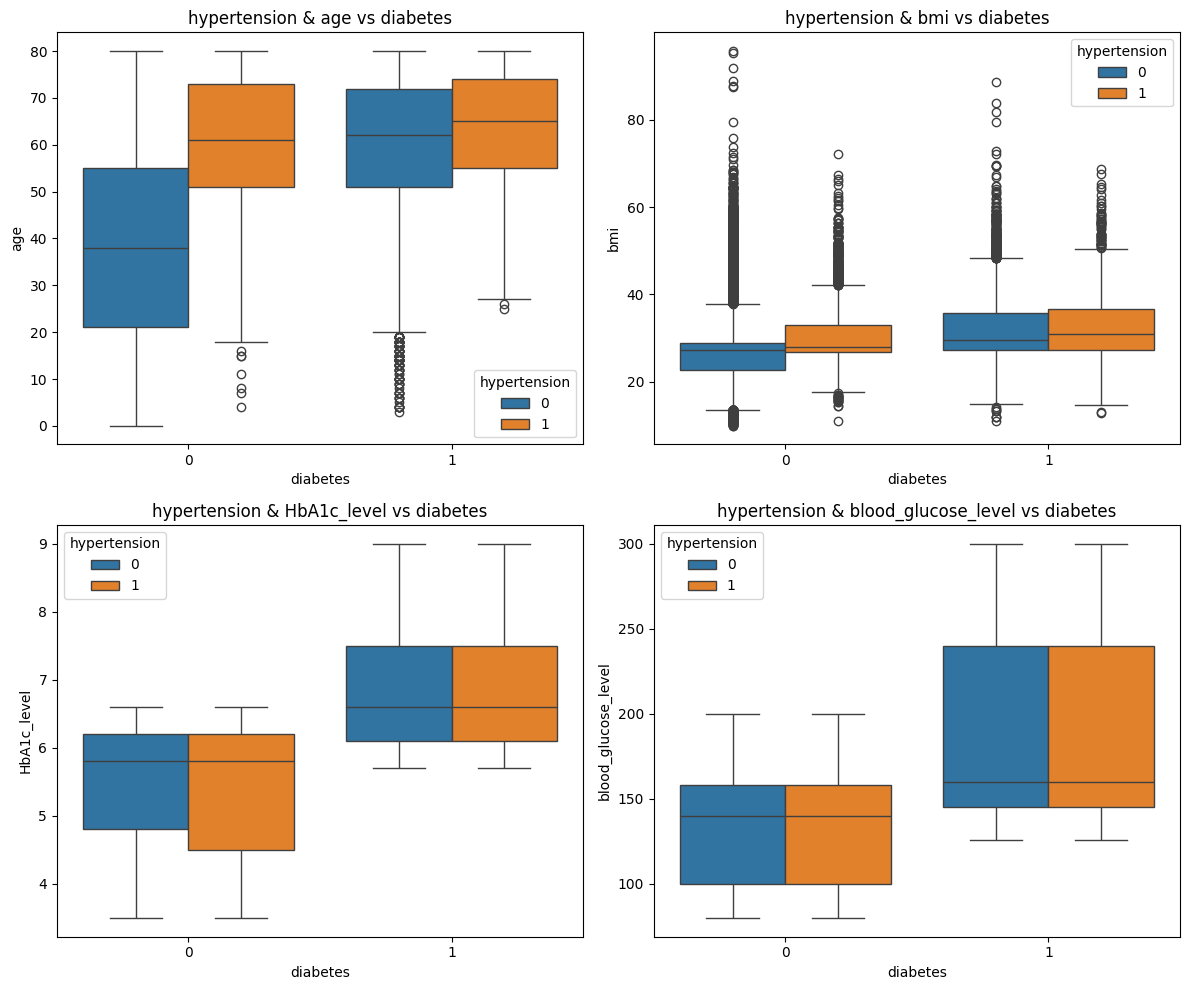

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(data=df, x='diabetes', y='age', hue='hypertension', ax=axes[0, 0])
axes[0, 0].set_title('hypertension & age vs diabetes')
sns.boxplot(data=df, x='diabetes', y='bmi', hue='hypertension', ax=axes[0, 1])
axes[0, 1].set_title('hypertension & bmi vs diabetes')
sns.boxplot(data=df, x='diabetes', y='HbA1c_level', hue='hypertension', ax=axes[1, 0])
axes[1, 0].set_title('hypertension & HbA1c_level vs diabetes')
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level', hue='hypertension', ax=axes[1, 1])
axes[1, 1].set_title('hypertension & blood_glucose_level vs diabetes')
plt.tight_layout()
plt.show()

**Nhận xét:**
Không có sự khác biệt quá nhiều giữa hai nhóm bị và không bị tăng huyết áp, do đó có thể nói các biến định lượng có ảnh hưởng lớn hơn so với biến hypertension. Bên cạnh đó, ta có thể thấy được rằng những người cao tuổi và có chỉ số BMI cao thường có tỷ lệ bị tăng huyết áp cao hơn người trẻ tuổi.

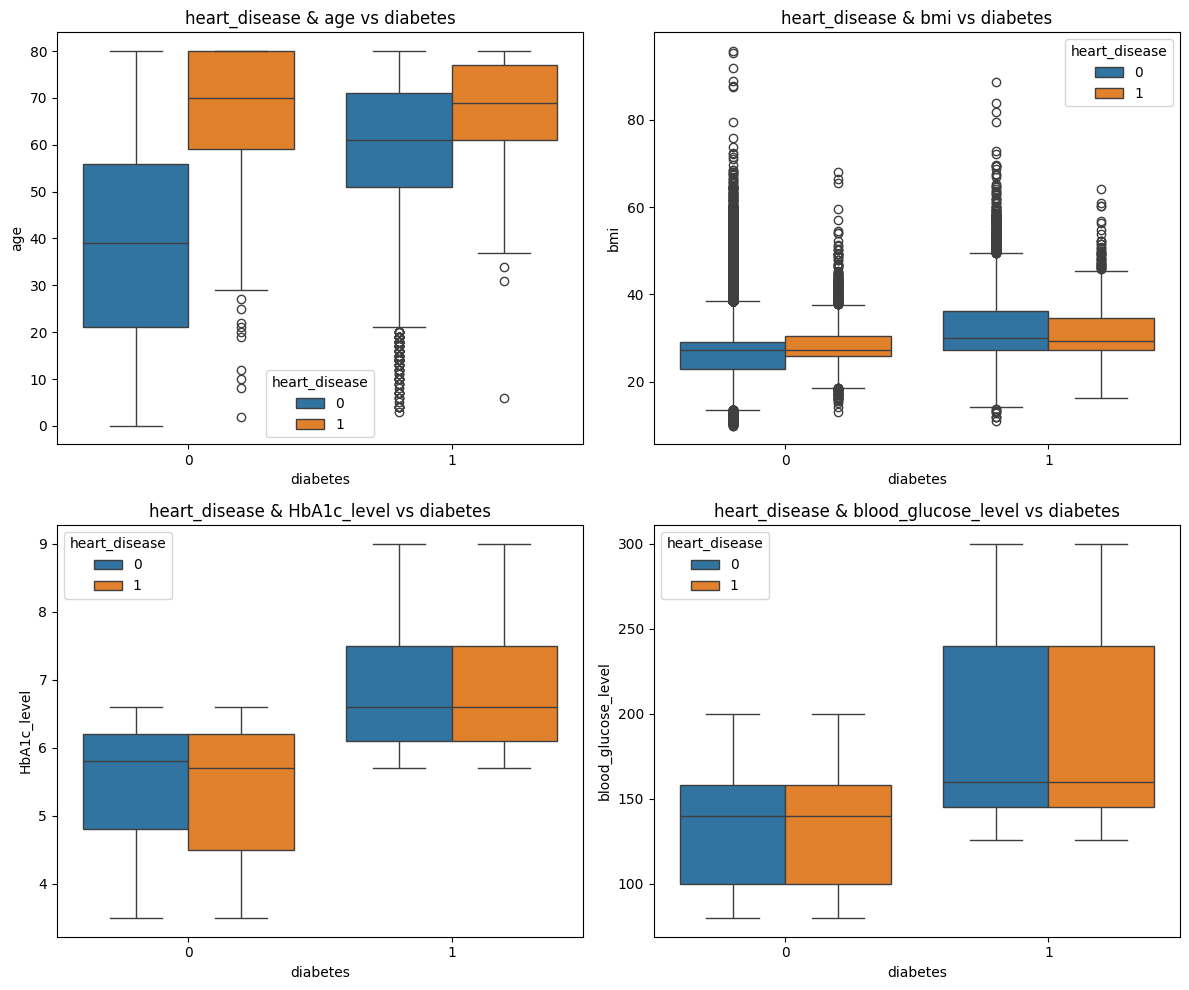

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(data=df, x='diabetes', y='age', hue='heart_disease', ax=axes[0, 0])
axes[0, 0].set_title('heart_disease & age vs diabetes')
sns.boxplot(data=df, x='diabetes', y='bmi', hue='heart_disease', ax=axes[0, 1])
axes[0, 1].set_title('heart_disease & bmi vs diabetes')
sns.boxplot(data=df, x='diabetes', y='HbA1c_level', hue='heart_disease', ax=axes[1, 0])
axes[1, 0].set_title('heart_disease & HbA1c_level vs diabetes')
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level', hue='heart_disease', ax=axes[1, 1])
axes[1, 1].set_title('heart_disease & blood_glucose_level vs diabetes')
plt.tight_layout()
plt.show()

:**Nhận xét:**  Tương tự như trên, các biến định lượng có ảnh hưởng lớn hơn so với biến heart_disease, những người cao tuổi thường có nguy cơ bị bệnh tim cao hơn. Bên cạnh đó,

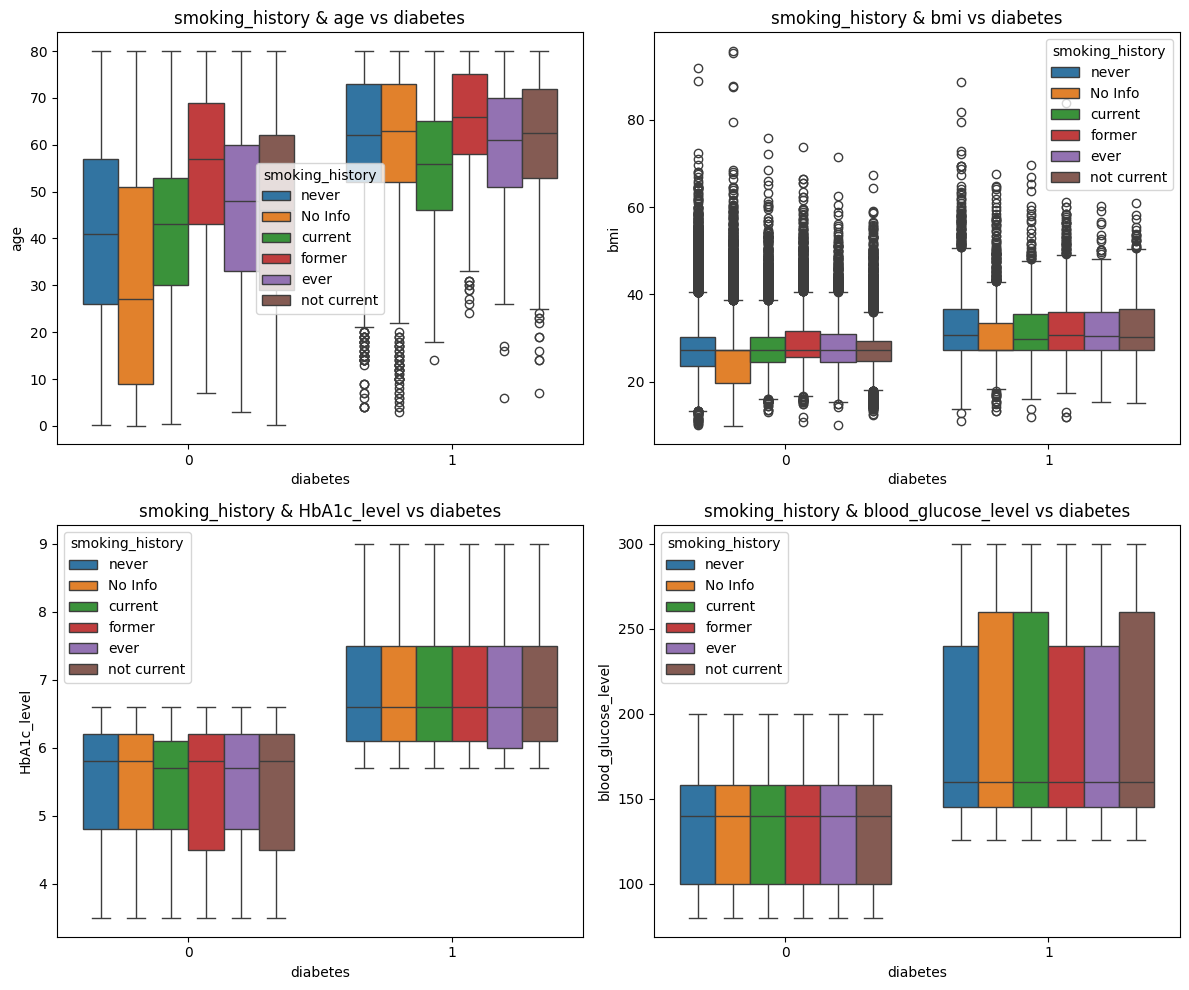

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(data=df, x='diabetes', y='age', hue='smoking_history', ax=axes[0, 0])
axes[0, 0].set_title('smoking_history & age vs diabetes')
sns.boxplot(data=df, x='diabetes', y='bmi', hue='smoking_history', ax=axes[0, 1])
axes[0, 1].set_title('smoking_history & bmi vs diabetes')
sns.boxplot(data=df, x='diabetes', y='HbA1c_level', hue='smoking_history', ax=axes[1, 0])
axes[1, 0].set_title('smoking_history & HbA1c_level vs diabetes')
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level', hue='smoking_history', ax=axes[1, 1])
axes[1, 1].set_title('smoking_history & blood_glucose_level vs diabetes')
plt.tight_layout()
plt.show()

**Nhận xét:**
 Không có sự khác biệt rõ ràng, có thể nói các biến định lượng có ảnh hưởng lớn hơn so với biến smoking_history.

#### Correlation

In [ ]:
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past-smoker'
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)
print(df['smoking_history'].value_counts())

smoking_history
non-smoker     67276
past-smoker    19655
current         9197
Name: count, dtype: int64


In [ ]:
df = pd.get_dummies(df, columns=['gender', 'smoking_history'])
cast_columns = ['gender_Female', 'gender_Male', 'smoking_history_current', 'smoking_history_non-smoker', 'smoking_history_past-smoker']
df[cast_columns] = df[cast_columns].astype(int)
print(df.head(5))

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Female  gender_Male  smoking_history_current  \
0         0              1            0                        0   
1         0              1            0                        0   
2         0              0            1                        0   
3         0              1            0                        1   
4         0              0            1                        1   

   smoking_history_non-smoker  smoking_history_past-smoker  
0                           1              

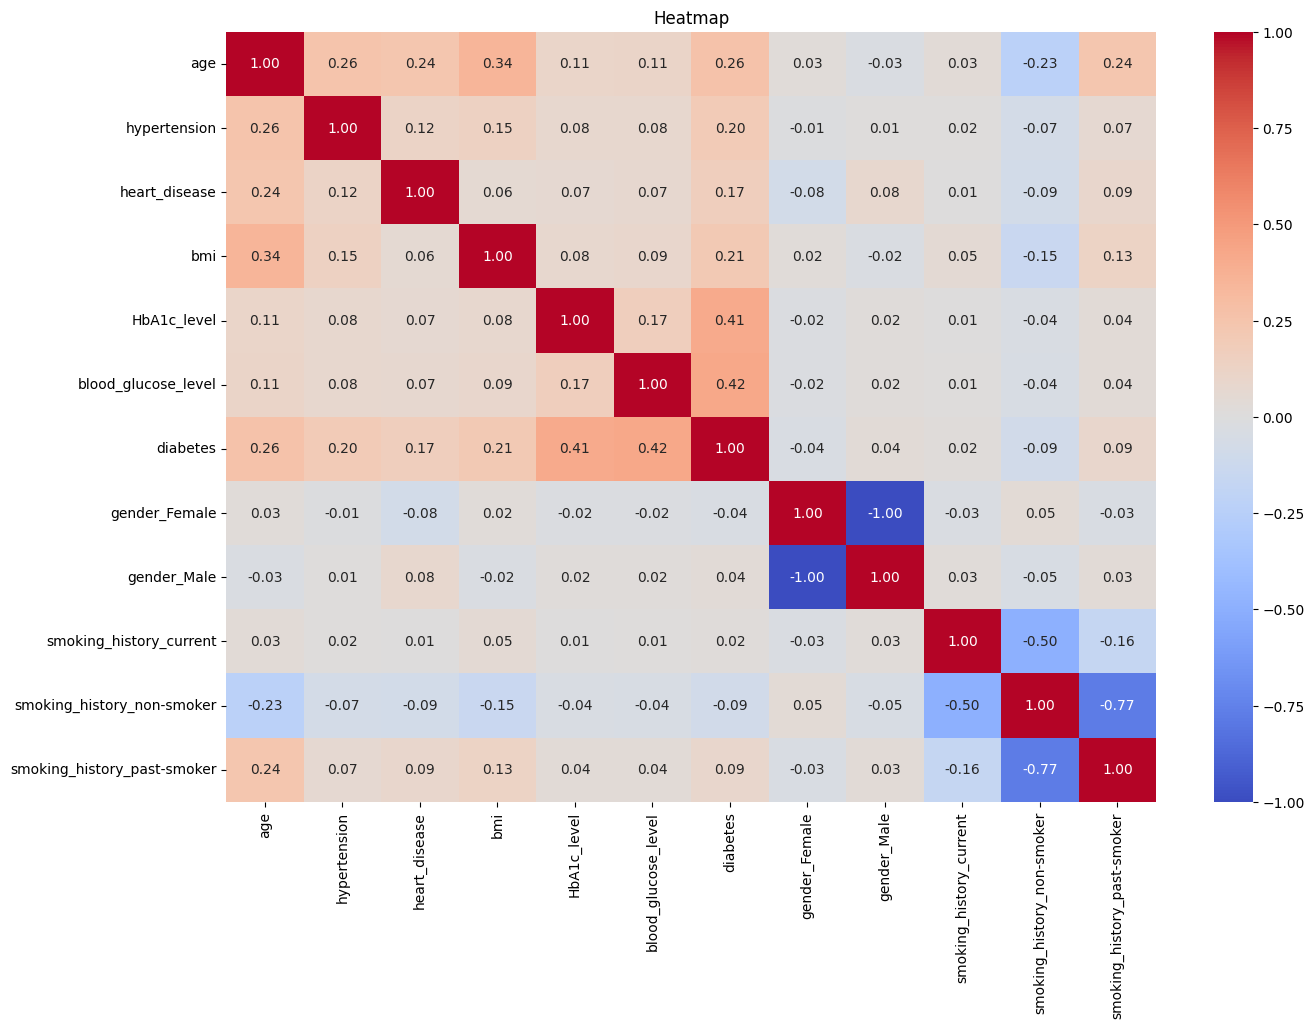

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap')
plt.show()

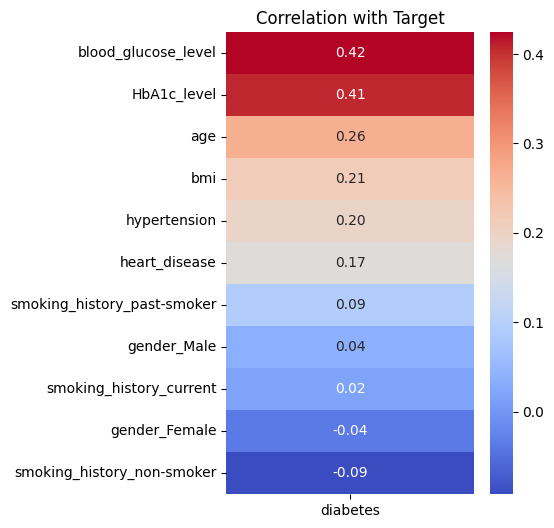

In [ ]:
target_corr = corr_matrix['diabetes'].drop('diabetes').sort_values(ascending=False)
plt.figure(figsize=(4, 6))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation with Target")
plt.show()

## Model Prediction


In [ ]:
# Evaluates the performance of a machine learning model using various metrics.
# Takes the true labels (y_test), predicted labels (y_pred), and predicted probabilities (y_prob) as input,
# Returns evaluation metrics including Accuracy, Precision, Recall, F1 Score, and ROC-AUC.
def evaluate_model(y_test, y_pred, y_prob):
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred), #(TP+TN)/(TP+TN+FP+FN)
        "Precision": precision_score(y_test, y_pred), #TP/(TP+FP)
        "Recall": recall_score(y_test, y_pred), #TP/(TP+FN)
        "F1 Score": f1_score(y_test, y_pred), #2*(precision*recall)/(precision+recall)
        "ROC-AUC": roc_auc_score(y_test, y_prob),
    }
    return metrics

# ROC curve to visualize the performance of the model
# Takes the true labels (y_test), predicted probabilities (y_prob), and model name (model_name) as input
def plot_roc_curve(y_test, y_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

def plot_confusion_matrix(y_test, y_pred, model_name):
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")

pipeline = {
    'LogisticRegression': imbPipeline([
        ('preprocessor', StandardScaler()),
        ('oversample', SMOTE(sampling_strategy=0.1)),
        ('undersample', RandomUnderSampler(sampling_strategy=0.5)),
        ('classifier', LogisticRegression(random_state=42, class_weight='balanced'))
    ]),
    'DecisionTree': imbPipeline([
        ('preprocessor', StandardScaler()),
        ('oversample', SMOTE(sampling_strategy=0.1)),
        ('undersample', RandomUnderSampler(sampling_strategy=0.5)),
        ('classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
    ]),
    'RandomForest': imbPipeline([
        ('preprocessor', StandardScaler()),
        ('oversample', SMOTE(sampling_strategy=0.1)),
        ('undersample', RandomUnderSampler(sampling_strategy=0.5)),
        ('classifier', RandomForestClassifier())
    ])
}

param_grid = {
    'LogisticRegression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100], #Điều chỉnh mức độ phạt(giá trị nhỏ tăng mức độ phạt, giảm overfit, giá trị lớn giảm mức độ phạt nhưng tăng overfit)
        'classifier__penalty': ['l1', 'l2'], #loại phạt: l1 đưa trọng số về 0 giảm số feature, l2 giảm biên độ trọng số nhưng k loại bỏ
        'classifier__solver': ['liblinear', 'saga'] #giải thuật được sử dụng(liblinear dữ liệu nhỏ, saga dữ liệu lớn)
    },
    'DecisionTree': {
        'classifier__max_depth': [None, 2, 4, 6, 8, 10], #độ sâu cây
        'classifier__criterion': ['gini', 'entropy'], #tiêu chí chọn cách tách dữ liệu ở mỗi nút
        'classifier__max_features': ['sqrt', 'log2', None] #số đặc trưng tối đa được xem xét khi chia
    },
    'RandomForest': {
        'classifier__n_estimators': [50, 100, 200], #số lượng cây quyết định
        'classifier__max_depth': [None, 10, 20], #độ sâu mỗi cây
        'classifier__min_samples_split': [2, 5, 10], #số lượng mẫu tối thiểu để chia một nút
        'classifier__min_samples_leaf': [1, 2, 4], #số lượng mẫu tối thiểu trong 1 lá
        'classifier__criterion': ['gini', 'entropy'] #tiêu chí chọn cách tách dữ liệu ở mỗi nút
    }
}

In [ ]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [ ]:
grid_search_log = GridSearchCV(pipeline['LogisticRegression'], param_grid['LogisticRegression'],
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1)
log_stime = time.time()
grid_search_log.fit(X_train, y_train)
log_etime = time.time()
print("Best Parameters: ", grid_search_log.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters:  {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


In [ ]:
best_log_model = grid_search_log.best_estimator_
best_log_y_pred = best_log_model.predict(X_test)
best_log_y_prob = best_log_model.predict_proba(X_test)[:, 1]
best_log_metrics = evaluate_model(y_test, best_log_y_pred, best_log_y_prob)
for metric, value in best_log_metrics.items():
    print(f"{metric}: {value}")
print(f"Thời gian huấn luyện mô hình: {log_etime - log_stime:.2f} giây")
print(classification_report(y_test, best_log_y_pred))

Accuracy: 0.8770935191927598
Precision: 0.40990745781164944
Recall: 0.8853615520282186
F1 Score: 0.5603720930232559
ROC-AUC: 0.9585666902325644
Thời gian huấn luyện mô hình: 40.99 giây
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     17525
           1       0.41      0.89      0.56      1701

    accuracy                           0.88     19226
   macro avg       0.70      0.88      0.74     19226
weighted avg       0.94      0.88      0.90     19226



#### Decision Tree

In [ ]:
grid_search_dt = GridSearchCV(pipeline['DecisionTree'], param_grid['DecisionTree'],
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1)
dt_stime = time.time()
grid_search_dt.fit(X_train, y_train)
dt_etime = time.time()
print("Best Parameters: ", grid_search_dt.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters:  {'classifier__criterion': 'gini', 'classifier__max_depth': 8, 'classifier__max_features': None}


In [ ]:
best_dt_model = grid_search_dt.best_estimator_
best_dt_y_pred = best_dt_model.predict(X_test)
best_dt_y_prob = best_dt_model.predict_proba(X_test)[:, 1]
best_dt_metrics = evaluate_model(y_test, best_dt_y_pred, best_dt_y_prob)
for metric, value in best_dt_metrics.items():
    print(f"{metric}: {value}")
print(f"Thời gian huấn luyện mô hình: {dt_etime - dt_stime:.2f} giây")
print(classification_report(y_test, best_dt_y_pred))

Accuracy: 0.88697597004057
Precision: 0.43355855855855857
Recall: 0.9053497942386831
F1 Score: 0.5863316200266514
ROC-AUC: 0.9718013151615941
Thời gian huấn luyện mô hình: 53.08 giây
              precision    recall  f1-score   support

           0       0.99      0.89      0.93     17525
           1       0.43      0.91      0.59      1701

    accuracy                           0.89     19226
   macro avg       0.71      0.90      0.76     19226
weighted avg       0.94      0.89      0.90     19226



#### Random Forest

In [ ]:
grid_search_rf = GridSearchCV(pipeline['RandomForest'], param_grid['RandomForest'], cv=5, n_jobs=-1, verbose=1)
rf_stime = time.time()
grid_search_rf.fit(X_train, y_train)
rf_etime = time.time()
print("Best Parameters: ", grid_search_rf.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters:  {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50}


In [ ]:
best_rf_model = grid_search_rf.best_estimator_
best_rf_y_pred = best_rf_model.predict(X_test)
best_rf_y_prob = best_rf_model.predict_proba(X_test)[:, 1]
best_rf_metrics = evaluate_model(y_test, best_rf_y_pred, best_rf_y_prob)
for metric, value in best_rf_metrics.items():
    print(f"{metric}: {value}")
print(f"Thời gian huấn luyện mô hình: {rf_etime - rf_stime:.2f} giây")
print(classification_report(y_test, best_rf_y_pred))

Accuracy: 0.9519920940393217
Precision: 0.7030271398747391
Recall: 0.7918871252204586
F1 Score: 0.7448161459773293
ROC-AUC: 0.9732794756126504
Thời gian huấn luyện mô hình: 1340.33 giây
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     17525
           1       0.70      0.79      0.74      1701

    accuracy                           0.95     19226
   macro avg       0.84      0.88      0.86     19226
weighted avg       0.96      0.95      0.95     19226



#### ROC Curve

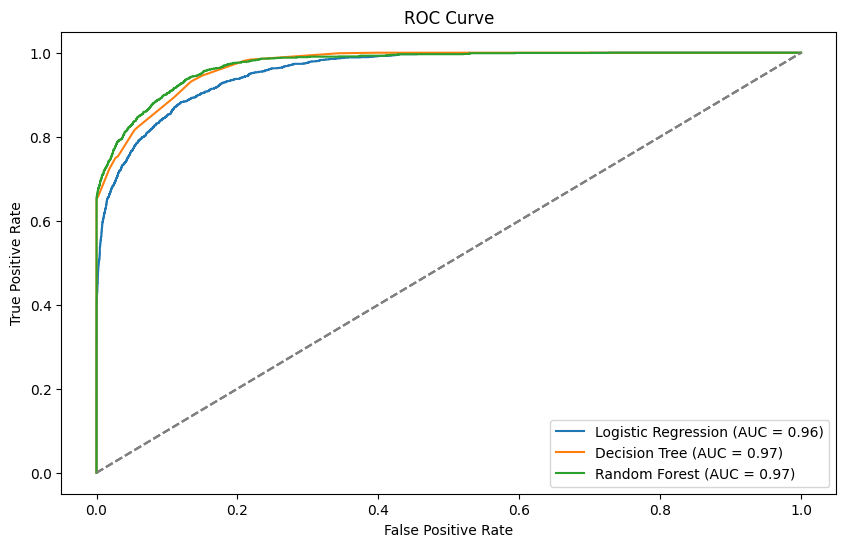

In [ ]:
plt.figure(figsize=(10, 6))
plot_roc_curve(y_test, best_log_y_prob, "Logistic Regression")
plot_roc_curve(y_test, best_dt_y_prob, "Decision Tree")
plot_roc_curve(y_test, best_rf_y_prob, "Random Forest")
plt.show()

**Nhận xét:** <br>
Cả ba mô hình đều có hiệu suất tốt khi mà AUC đều gần bằng một, tuy nhiên dựa vào hình vẽ và các giá trị của AUC ta có thể thấy hiệu suất của mô hình Random Forest là cao nhất, sao đó là đến Decision Tree, cuối cùng là Logistic Regression.

#### Confusion Matrix

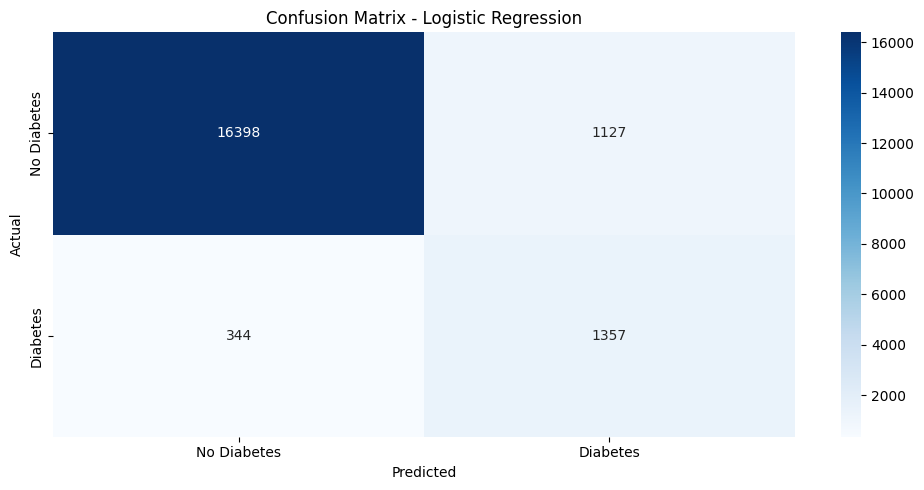

In [ ]:
plt.figure(figsize=(10, 5))
plot_confusion_matrix(y_test, best_log_y_pred, "Logistic Regression")
plt.tight_layout()
plt.show()

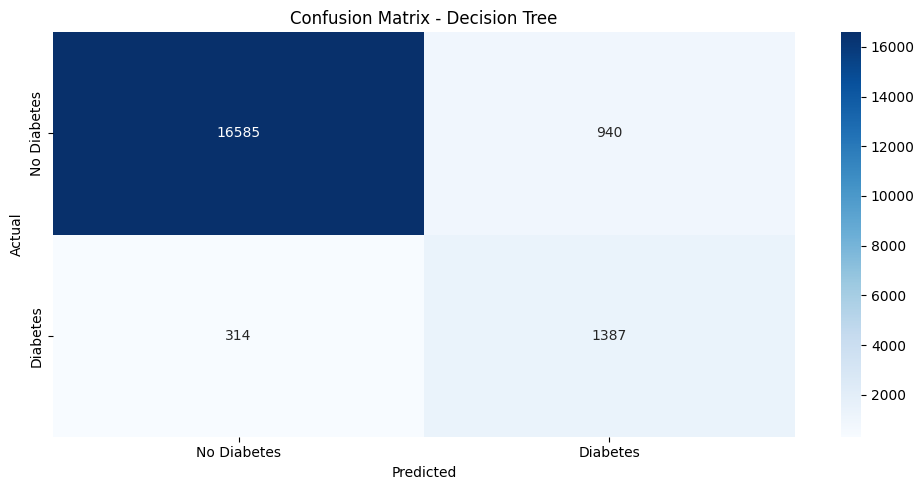

In [ ]:
plt.figure(figsize=(10, 5))
plot_confusion_matrix(y_test, best_dt_y_pred, "Decision Tree")
plt.tight_layout()
plt.show()

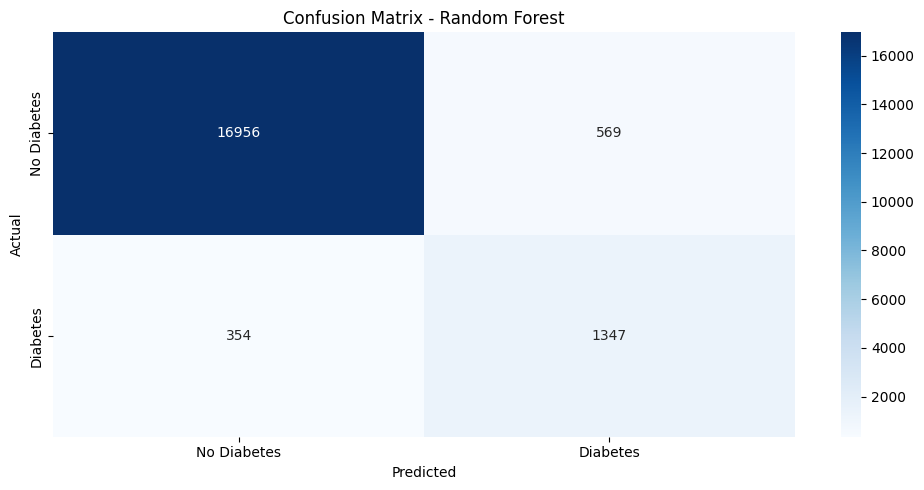

In [ ]:
plt.figure(figsize=(10, 5))
plot_confusion_matrix(y_test, best_rf_y_pred, "Random Forest")
plt.tight_layout()
plt.show()

#### Nhận xét về các mô hình
- Logistic Regression:  
  - True Positive: 1357 mẫu  
  - False Positive: 1127 mẫu  
  - True Negative: 16398 mẫu  
  - False Negative: 344 mẫu  
- Decision Tree:  
  - True Positive: 1387 mẫu  
  - False Positive: 940 mẫu  
  - True Negative: 16585 mẫu  
  - False Negative: 314 mẫu  
- Random Forest:  
  - True Positive: 1347 mẫu  
  - False Positive: 569 mẫu  
  - True Negative: 16956 mẫu  
  - False Negative: 354 mẫu  